In [1]:
import sys
sys.path.append('/Users/jpnousu/pyAPES_main')
from pyAPES.snow.pyFSM2.fsm2_standalone import FSM2
from pyAPES.utils.iotools import read_forcing
from pyAPES.parameters.mlm_parameters import gpara, cpara, spara, fsm2 # model configuration, canopy parameters, soil parameters
from pyAPES.utils.constants import DEG_TO_KELVIN
import matplotlib.pyplot as plt
import cProfile

In [2]:
# Manipulating the params to correspond to those of Degerö
gpara['forc_filename'] = r'/Users/jpnousu/pyAPES_main/forcing/Degero/Degero_forcing_2014-2016.dat'
gpara['start_time'] = '2014-09-01'
gpara['end_time'] = '2015-09-01'

# Reading the forcing file
forcing = read_forcing(
    forcing_file=gpara['forc_filename'],
    start_time=gpara['start_time'],
    end_time=gpara['end_time'],
    dt=gpara['dt']
)

forcing = forcing.rename(columns={'P': 'Ps', 'LWin': 'LW', 'U': 'Ua'})
forcing['Rf'] = forcing['Prec'].where(forcing['Tair'] > 1, 0)
forcing['Sf'] = forcing['Prec'].where(forcing['Tair'] <= 1, 0)
forcing['SWsrf'] = forcing['diffNir'] + forcing['diffPar'] + forcing['dirNir'] + forcing['dirPar']
forcing['RH'] = 80.
forcing['Ta'] = forcing['Tair'] + DEG_TO_KELVIN

snowmodel = FSM2(fsm2)

In [4]:
swelist = []
for step in range(len(forcing)):
    forc = forcing.iloc[step]
    snowmodel.run(dt=gpara['dt'], forcing=forc)
    snowmodel.update()
    swelist.append(snowmodel.swe)

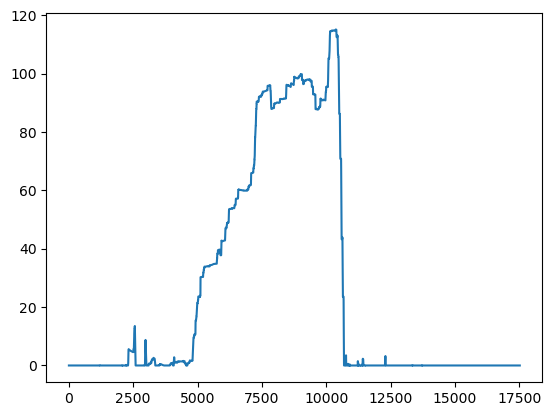

In [5]:
plt.plot(swelist)

In [3]:
import cProfile

def run_loop():
    swelist = []
    for step in range(len(forcing)):
        forc = forcing.iloc[step]
        snowmodel.run(dt=gpara['dt'], forcing=forc)
        snowmodel.update()
        swelist.append(snowmodel.swe)

    return swelist

cProfile.run('run_loop()', sort='cumtime')  # or 'tottime', 'time', etc.

         8455169 function calls (8402604 primitive calls) in 6.675 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    6.675    6.675 {built-in method builtins.exec}
        1    0.000    0.000    6.675    6.675 <string>:1(<module>)
        1    0.043    0.043    6.675    6.675 358722790.py:3(run_loop)
    17521    0.103    0.000    5.861    0.000 fsm2_standalone.py:53(run)
    17521    1.406    0.000    3.977    0.000 srfebal.py:220(run)
   420504    1.511    0.000    1.535    0.000 srfebal.py:637(psim)
    17521    0.019    0.000    0.758    0.000 indexing.py:1139(__getitem__)
    17521    0.034    0.000    0.720    0.000 indexing.py:1681(_getitem_axis)
    17521    0.039    0.000    0.582    0.000 frame.py:3779(_ixs)
   210252    0.550    0.000    0.566    0.000 srfebal.py:656(psih)
    17521    0.350    0.000    0.539    0.000 snow.py:148(run)
   140168    0.129    0.000    0.469    0.000 se